In [1]:
## . . Import the plotting and libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import *

## . . For animation
from matplotlib import animation
from IPython.display import HTML

<h1><center>LAB 1 - Finite Differences, Discretization and the 2D Advection Equation</center></h1>

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499

The purpose of this lab is to get you thinking about finite-difference approximations, partial differential discretizations, and their use in solving the 2D advection equation.

## Part 1 - Deriving finite-difference approximations

In the course notes we explored how to develop first- and second-order accurate Taylor-series approximations (i.e., $\mathcal{O}(\Delta t)$ and $\mathcal{O}(\Delta t^2)$, respectively) of a first-derivative operator as well as a second-order accurate Taylor-serieapproximation of the second-derivative operator.  However, we did not derive a **fourth-order accurate** approximation of the **second-derivative** operator.

**Q1-1**: Show that the **fourth-order accurate second-derivative** Taylor-series approximation can be written as

$$f^{\prime\prime}(t) \approx \frac{1}{\Delta t^2}\sum_{k=-2}^{2} c_k f(t+k\Delta t), \tag{1} $$

where

$$\left[c_{-2},c_{-1},c_{0},c_{1},c_{2}\right] = \left[-\frac{1}{12},\frac{4}{3}, -\frac{5}{2}, \frac{4}{3},−\frac{1}{12}\right]. \tag{2}$$

Note: You can either $\LaTeX$ your solution or write it out by hand, take a photo, and embed it in your Jupyter notebook (don't forget to include it with your submission).

## . . Your answer to Q1-1 goes here
Firt we will start with five eqns we need to find the taylor series expansions of $[f(t - 2\Delta t), \; f(t-\Delta t), \; f(t), \; f(t+\Delta t), \; f(t+2\Delta t)]$.

\begin{gather}
f(t - 2\Delta t) = f(t) - 2\Delta t f'(t) + 4\Delta t^2 \frac{f''(t)}{2!} - 8\Delta t^3 \frac{f'''(t)}{3!} + 16\Delta t^4 \frac{f^4(\tilde{t})}{4!}+ O((\Delta t)^5) \\
f(t - \Delta t) = f(t) - \Delta t f'(t) + \Delta t^2 \frac{f''(t)}{2!} - \Delta t^3 \frac{f'''(t)}{3!} + \Delta t^4 \frac{f^4(\tilde{t})}{4!}+ O((\Delta t)^5) \\
f(t) = f(t) + O((\Delta t)^5) \\
f(t + \Delta t) = f(t) + \Delta t f'(t) + \Delta t^2 \frac{f''(t)}{2!} + \Delta t^3 \frac{f'''(t)}{3!} + \Delta t^4 \frac{f^4(\tilde{t})}{4!}+ O((\Delta t)^5) \\
f(t + 2\Delta t) = f(t) + 2\Delta t f'(t) + 4\Delta t^2 \frac{f''(t)}{2!} + 8\Delta t^3 \frac{f'''(t)}{3!} + 16\Delta t^4 \frac{f^4(\tilde{t})}{4!}+ O((\Delta t)^5) \\
\end{gather}

The linear combination of these values should result in an approimation for our second derivative, specifically:
\begin{equation*}
f''(t) \approx af(t-2\Delta t) + bf(t-\Delta t) + cf(t) + df(t+\Delta t) + ef(t+2\Delta t).
\end{equation*}
Now we need to solbe for our coefficients $[a,b,c,d,e]$ using a system of linear equations.
To do this we need substitue our taylor expansions into the above equation and group like terms.
\begin{align*}
f''(t) &\approx af(t) - 2a\Delta t f'(t) + 4a\Delta t^2\frac{f''(t)}{2!} - 8a\Delta t^3 \frac{f'''(t)}{3!} + 16a\Delta t^4 \frac{f^4(\tilde{t})}{4!}+ aO((\Delta t)^5) \\
&+ bf(t) - b\Delta t f'(t) + b\Delta t^2 \frac{f''(t)}{2!} - b\Delta t^3 \frac{f'''(t)}{3!} + b\Delta t^4 \frac{f^4(\tilde{t})}{4!}+ bO((\Delta t)^5) \\
&+ cf(t) + cO((\Delta t)^5) \\
&+ df(t) + d\Delta t f'(t) + d\Delta t^2\frac{f''(t)}{2!} + d\Delta t^3 \frac{f'''(t)}{3!} + d\Delta t^4 \frac{f^4(\tilde{t})}{4!}+ dO((\Delta t)^5)\\
&+ ef(t) + 2e\Delta t f'(t) + 4e\Delta t^2\frac{f''(t)}{2!} + 8e\Delta t^3 \frac{f'''(t)}{3!} + 16e\Delta t^4 \frac{f^4(\tilde{t})}{4!}+ eO((\Delta t)^5)\\
\end{align*}
Now we group like terms:
\begin{align*}
f''(x) &\approx (a+b+c+d+e)f(t) + (-2a-b+c+d+2e)(\Delta f'(t)) + (4a+b+d+4e)(\Delta t^2\frac{f''(t)}{2!})\\
&+ (-8a-b+d+8e)(\Delta t^3 \frac{f'''(t)}{3!})
+ (16a+b+d+16e)(\Delta t^4 \frac{f^4(\tilde{t})}{4!})+ (a+b+c+d+e)(O((\Delta t)^5)).
\end{align*}
Since $f''(t)$ is the only term on LHS of the equation its coefficents must equal one while all other coefficients must equal zero, so we get the following system of equations:
\begin{gather}
(a+b+c+d+e)=0 \\
(-2a-b+d+2e)=0 \\
(4a+b+d+4e) = \frac{2}{\Delta t^2} &  \text{(Match our LHS term and our $\Delta t^2\frac{f''(t)}{2!}$ term )}\\
(-8a-b+d+8e) = 0 \\
(16a+b+d+16e) = 0
\end{gather}
Then we get the matrix multiplication problem $Ax=B$:
\begin{equation*}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
-2 & -1 & 0 & 1 & 2 \\
4 & 1 & 0 & 1 & 4 \\
-8 & -1 & 0 & 1 & 8 \\
16 & 1 & 0 & 1 & 16
\end{bmatrix}
\times
\begin{bmatrix}
a \\
b \\
c \\
d \\
e
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
\frac{2}{\Delta t^2} \\
0 \\
\end{bmatrix}
\end{equation*}
Then solving for our coefficient matrix by taking the inverse of our '$A$' matrix and multiplying by $B$ ($x=A^{-1}B$) gives:
\begin{equation*}
x=
\begin{bmatrix}
-\frac{1}{12}\frac{1}{\Delta t^2} \\
\frac{4}{3}\frac{1}{\Delta t^2} \\
-\frac{5}{2}\frac{1}{\Delta t^2} \\
\frac{4}{3}\frac{1}{\Delta t^2} \\
-\frac{1}{12}\frac{1}{\Delta t^2}
\end{bmatrix}
\end{equation*}
Note: The sum of these coefficeinets are $0$ thus our error term goes away in our final approximation.

Now we can rewrite our original approximation for $f''(t)$,
\begin{equation*}
f''(t) \approx \frac{1}{\Delta t^2}\left(-\frac{1}{12}f(t-2\Delta t) +\frac{4}{3}f(t-\Delta t)+ -\frac{5}{2}f(t) + \frac{4}{3}f(t+\Delta t) + -\frac{1}{12}f(t+2\Delta t)\right).
\end{equation*}
Now letting $\left[c_{-2},c_{-1},c_{0},c_{1},c_{2}\right] = [a,b,c,d,e]$ and $k=-2, -1, 0, 1, 2$ we can rewrite the above equation as,
\begin{equation*}
f''(t) \approx \frac{1}{\Delta t^2}\sum_{k=-2}^{2} c_k f(t+k\Delta t).
\end{equation*}



## Part 2 - Applying finite-difference approximations

When modeling seismic and GPR data, we often use the [Ricker wavelet](https://en.wikipedia.org/wiki/Mexican_hat_wavelet) to characterize the source function that is used to excite waves throughout the subsurface. The Ricker wavelet is given by the following equation:

$$\psi (t)={\frac {2}{{\sqrt {3\sigma }}\pi ^{1/4}}}\left(1-\left({\frac {t-t_0}{\sigma }}\right)^{2}\right)e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}. \tag{3} $$

where $\sigma$ controls the width of the wavelet and $t_0$ is used to shift its horizontal location. Here is an example for $\sigma=0.04$ and $t_0=2.0$s.

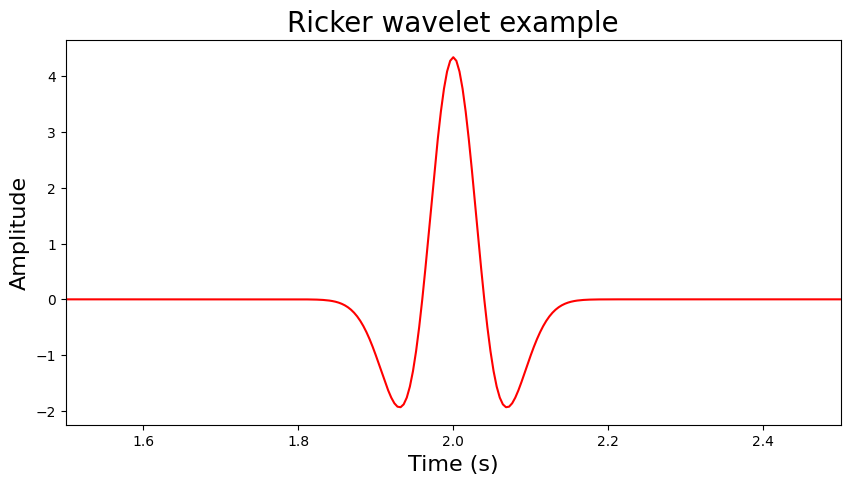

In [2]:
## . Define time axis
nt,dt=1024,0.004
t = np.arange(0,nt)*dt

## . . Define ricker parameters
ss,t0 = 0.04,2.0
R = 2/np.sqrt(3*ss*np.sqrt(np.pi))*(1-((t-t0)/ss)**2)*np.exp(-(t-t0)**2/(2*ss**2))

## . . Plot wavelet
plt.figure(figsize=(10,5))
plt.plot(t,R,'r')
plt.xlim(1.5,2.5);plt.xlabel('Time (s)',fontsize=16);plt.ylabel('Amplitude',fontsize=16)
plt.title('Ricker wavelet example',fontsize=20)
plt.show()

Let's now say that we want to compute the time derivative of equation 3 both analytically (i.e., $\psi^\prime(t)$) and numerically with different orders of Taylor-series finite-difference approximation (i.e., $\psi^\prime_{(n)}(t)$ where subscript $n$ stands for a $\mathcal{O}(\Delta t^n)$ accurate approximation).  

This question looks at how the percentage error $\epsilon$ between the analytic and numerical changes as a function of $\sigma$ (a proxy for frequency) in equation 3 for the approximation order $n$:

$$\epsilon(t,\sigma,n) = 100 \frac{\left( \psi^\prime(t) - \psi^\prime_{(n)}(t)\right)}{N} \tag{4}$$

where $N$ is a normalization factor, which I've taken to be the **maximum** of $|\Psi^{\prime}(t)|$ where $|\cdot|$ represent absolute value signs.

**Q2-1**: What is the **analytic** derivative of the Ricker wavelet in equation 3 (i.e., $\psi^\prime(t)$)?

## . . Your answer to Q2-1 goes here
First we notice that the leading coefficient does not depend on $t$ so we can ignore it for now. Now we need to perform the product rule on the remaining equation.

First we will find the derivatives of the indiviudal products (i.e. $e^{x}$).
\begin{gather*}
\frac{d}{dt}\left(e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\right)= \frac{-2(t-t_0)}{2\sigma^2}e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}} \\
\frac{d}{dt}\left( 1-\left(\frac{t-t_0}{\sigma}\right)^2 \right) = -2\frac{t-t_0}{\sigma^2}
\end{gather*}
Now applying the product rule (without the leading constant still) we get,
\begin{equation*}
\frac{d}{dt}\left( \left(1-\left({\frac {t-t_0}{\sigma }}\right)^{2}\right)e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}} \right) = \left(e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\right)\left( -2\frac{t-t_0}{\sigma^2} \right) + \left( 1-\left(\frac{t-t_0}{\sigma}\right)^2 \right) \left(  \frac{-2(t-t_0)}{2\sigma^2}e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\right).
\end{equation*}
We can simplify this and get,
\begin{align*}
\left(e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\right)\left( -2\frac{t-t_0}{\sigma^2} \right) + \left( 1-\left(\frac{t-t_0}{\sigma}\right)^2 \right) \left(  \frac{-2(t-t_0)}{2\sigma^2}e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\right) &= \left(e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\right) \left[ -2\frac{t-t_0}{\sigma^2} +  \left( 1-\left(\frac{t-t_0}{\sigma}\right)^2 \right)\left(  \frac{-2(t-t_0)}{2\sigma^2} \right ) \right] \\
&= \left(e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\right)\left[-2\frac{t-t_0}{\sigma^2} + \frac{(t-t_0)^3}{\sigma^4} - \frac{t-t_0}{\sigma^2} \right] \\
&= \left(e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\right) (t-t_0) \left[ \frac{(t-t_0)^2-3\sigma^2}{\sigma^4} \right].
\end{align*}
So our final derivative is,
\begin{equation*}
\boxed{
\psi ' (t) =  {\frac {2(t-t_0) }{{\sqrt {3\sigma }}\pi ^{1/4}}} \left(e^{-{\frac {(t-t_0)^{2}}{2\sigma ^{2}}}}\right)\left[ \frac{(t-t_0)^2-3\sigma^2}{\sigma^4} \right].
}
\end{equation*}

**Q2-2**: Let's now look at the accuracy of different orders of numerical first-derivative operators. Perform the following 5 steps:

(1) Create a time axis with $nt=1024$ samples at interval $dt=0.004$ s and then define a Ricker wavelet assuming $\sigma=0.01$ and $t_0=2$ in equation 3 above.

(2) Create 4 short arrays with the coefficients for the 2nd-, 4th-, 6th- and 8th-order first-derivative approximations.

(3) Apply the first-derivative filters using four calls to python's convolution routine
   
       np.convolve(ricker,filter,mode='same')
   
like (most of) you implemented in the previous Digital Signal Processing course.  It would be good practice to put the filtering steps into a function that can be called later in question 2-4 below. You may also using numpy slicing method instead of convolutional method.
   
(4) Include a subplot showing the analytic derivative and the 4 different numerical approximations (in different colors) on top of each other and include a legend.

(5) Include an **error** subplot showing the **differences** between the analytic and 4 orders of numerical first derivatives.

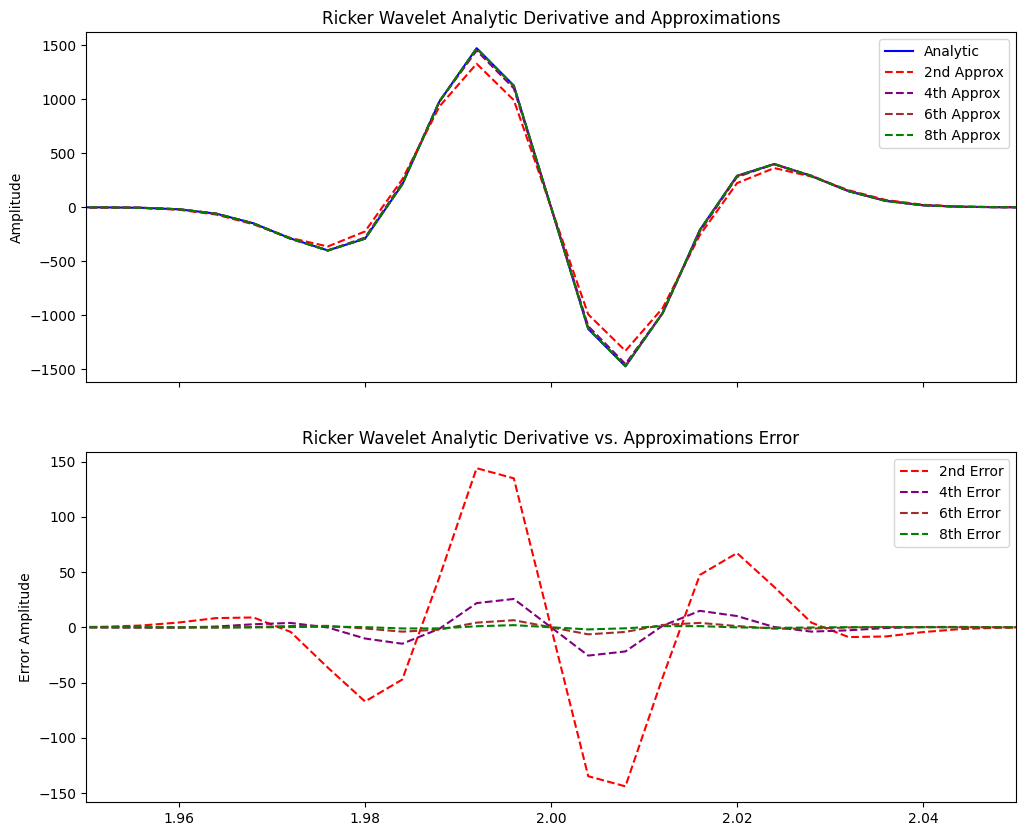

In [3]:
## . . Your answer to Q2-2 goes here
#define variables(1)
nt=1024
dt=0.004
t= np.arange(0, nt*dt, dt)
sigma=0.01
t0=2

#define ricker wavelets(1)
ricker= 2/np.sqrt(3*sigma*np.sqrt(np.pi**(1/4)))*(1-((t-t0)/sigma)**2)*np.exp(-(t-t0)**2/(2*sigma**2))
rickerDeriv= 2*(t-t0)/np.sqrt(3*sigma*np.sqrt(np.pi**(1/4)))*(((t-t0)**2 - 3*sigma**2)/sigma**4)*np.exp(-(t-t0)**2/(2*sigma**2))

#define derivative coefficients (from table in slides) (2)
second= [0, 0, 0, -1/2, 0, 1/2, 0, 0, 0]
fourth = [0, 0, 1/12, -2/3, 0, 2/3, -1/12, 0, 0]
sixth= [0, -1/60, 3/20, -3/4, 0, 3/4, -3/20, 1/60, 0]
eighth= [1/280, -4/105, 1/5, -4/5, 0, 4/5, -1/5, 4/105, -1/280]

#Convolve first deriv filters (3)
def firstDerivFilter(wavelet, filter):
    conv = np.convolve(wavelet,filter[::-1],mode='same') /dt
    err = rickerDeriv - conv
    return conv, err
ricker2, err2 = firstDerivFilter(ricker, second)
ricker4, err4 = firstDerivFilter(ricker, fourth)
ricker6, err6 = firstDerivFilter(ricker, sixth)
ricker8, err8 = firstDerivFilter(ricker, eighth)

#plot approxs and actual deriv (4)
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
axs[0].plot(t, rickerDeriv, label='Analytic', color='blue')
axs[0].plot(t, ricker2, label='2nd Approx', color='red', linestyle='--')
axs[0].plot(t, ricker4, label='4th Approx', color='purple', linestyle='--')
axs[0].plot(t, ricker6, label='6th Approx', color='brown', linestyle='--')
axs[0].plot(t, ricker8, label='8th Approx', color='green', linestyle='--')
axs[0].set_title('Ricker Wavelet Analytic Derivative and Approximations')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(1.95,2.05)
axs[0].legend()

#error subplot (5)
axs[1].plot(t, err2, label='2nd Error', color='red', linestyle='--')
axs[1].plot(t, err4, label='4th Error', color='purple', linestyle='--')
axs[1].plot(t, err6, label='6th Error', color='brown', linestyle='--')
axs[1].plot(t, err8, label='8th Error', color='green', linestyle='--')
axs[1].set_title('Ricker Wavelet Analytic Derivative vs. Approximations Error')
axs[1].set_ylabel('Error Amplitude')
axs[1].set_xlim(1.95,2.05)
axs[1].legend()

**Q2-3:** Discuss how the error varies as function of the order of numerical approximation.  Highlighting the maximum and/or average error (in terms of absolute value) for each scenario would be appropriate.

In [4]:
## . . Your answer to Q2-3 goes here
#gather maximum, average etc.
mean2= np.mean(np.abs(err2))
mean4= np.mean(np.abs(err4))
mean6= np.mean(np.abs(err6))
mean8= np.mean(np.abs(err8))

max2= np.max(np.abs(err2))
max4= np.max(np.abs(err4))
max6= np.max(np.abs(err6))
max8= np.max(np.abs(err8))

print("2nd Derivative-- Mean: ", mean2, "Max: ", max2)
print("4nd Derivative-- Mean: ", mean4, "Max: ", max4)
print("6nd Derivative-- Mean: ", mean6, "Max: ", max6)
print("8nd Derivative-- Mean: ", mean8, "Max: ", max8)

2nd Derivative-- Mean:  0.9830637062767462 Max:  144.02860253302197
4nd Derivative-- Mean:  0.1606889188142344 Max:  25.63513855167207
6nd Derivative-- Mean:  0.04082608028049562 Max:  6.3873605984708774
8nd Derivative-- Mean:  0.011833950410318823 Max:  1.9238916916449398


## . . Your answer to Q2-3 goes here
As the function order increases the error varies more. This is evident by the red dashed line ($2$nd order error) diverging from zero the most, followed by the purple dashed line ($4$th order error) diverging the second most. Additionaly, we notice that the average error is decreasing as order is increasing. For example, the average error for the $2$nd derivative approximation is $0.9831$ meanwhile the average error for the $8$th derivative approximation is $0.0118$. Additionally, we see that the maximum error for the $2$nd derivative was $144.03$, meanwhile the maximum for the $8$th derivative is only $1.92$.   

**Q2-4:** Let's now examine how the **maximum error** in the first-derivative approximation changes as a function of $\sigma$ in equation 3 above. Calculate the **maximum error** for different $\sigma$ values in the following range:

     np.arange(0.004,0.021,0.001)
     
for the four different approximation orders.  Generate a plot showing how the maximum error changes as a function of $\sigma$.

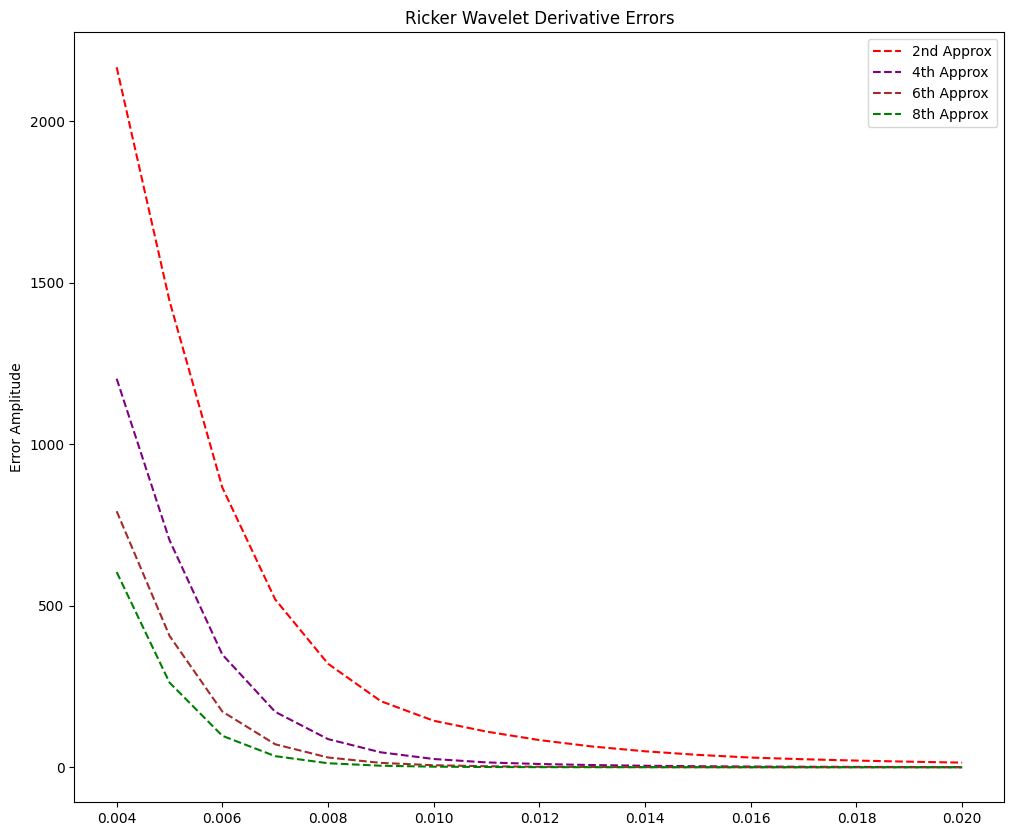

In [5]:
## . . Your answer to Q2-4 goes here
sigmas = np.arange(0.004, 0.021, 0.001)
max2s=[]
max4s=[]
max6s=[]
max8s=[]
for sigma in sigmas:
    rickerDeriv= 2*(t-t0)/np.sqrt(3*sigma*np.sqrt(np.pi**(1/4)))*(((t-t0)**2 - 3*sigma**2)/sigma**4)*np.exp(-(t-t0)**2/(2*sigma**2))
    ricker= 2/np.sqrt(3*sigma*np.sqrt(np.pi**(1/4)))*(1-((t-t0)/sigma)**2)*np.exp(-(t-t0)**2/(2*sigma**2))

    ricker2, err2 = firstDerivFilter(ricker, second)
    ricker4, err4 = firstDerivFilter(ricker, fourth)
    ricker6, err6 = firstDerivFilter(ricker, sixth)
    ricker8, err8 = firstDerivFilter(ricker, eighth)

    max2s.append(np.max(err2))
    max4s.append(np.max(err4))
    max6s.append(np.max(err6))
    max8s.append(np.max(err8))

fig, axs = plt.subplots(1, 1, figsize=(12, 10), sharex=True)
axs.plot(sigmas, max2s, label='2nd Approx', color='red', linestyle='--')
axs.plot(sigmas, max4s, label='4th Approx', color='purple', linestyle='--')
axs.plot(sigmas, max6s, label='6th Approx', color='brown', linestyle='--')
axs.plot(sigmas, max8s, label='8th Approx', color='green', linestyle='--')
axs.set_title('Ricker Wavelet Derivative Errors')
axs.set_ylabel('Error Amplitude')
axs.legend()



**Q2-5:** Discuss how the maximum error changes as a function of $\sigma$ and approximation order, and speculate how this might affect the numerical computation of PDEs.

## . . Your answer to Q2-5 goes here
As $\sigma$ increases we see that the maximum error of our approximations decreases and most errors reach zero. The $\sigma$ value controls the width of our wavelet, so it makes sense that the wider our wavelet is, the less precise or detailed our approximation needs to be, so maximum error would decrease. By increasing the order of our approximations, we are decreasing the error, but these higher order methods are more sensitive to changes in our data, and require more computational effort so it might be neccessary to use lower order methods, but based on the results above, we would be able to decrease the lower-order method's errors by increasing $\sigma$. All of the afformentioned impacts of $\sigma$ impact the numerical computation of PDEs. That is to say that a larger $\sigma$ would reduce error in our computations but also reduce certainty/resolution. So its important to balance approximation order and $\sigma$ value.   

## Part 3 - 2D Advection Equation

**(1) PDE:** The 2D advection equation is written in the following way:

$$\frac{\partial U}{\partial t} + {\bf v}\cdot \nabla U = 0, \tag{5a}$$

or when expanded out in partial differential operators

$$\frac{\partial U}{\partial t} +v_x \frac{\partial U}{\partial x} +v_y \frac{\partial U}{\partial y} =0, \tag{5a}$$

where ${\bf v}=[v_x,v_y]$ are the components of the advection velocity.  The goal of this question is to solve the **2D Advection Equation** using a 2D version of the 1D Lax-Wendroff developed in the course notes, which will allow for transport of some disturbance (e.g., a pollutant in a lake) in some direction defined by

$$\theta = {\rm atan}\left(\frac{v_y}{v_x} \right), \tag{6} $$

defined on $x,y\in[0,1]$.

**(2) Boundary Conditions:** You may assume  the following **boundary conditions**:

$$U(x=0,y)= U(x=1,y) = U(x,y=0) = U(x=1,y) = 0, \tag{8}$$

which means that there zero disturbance (i.e., pollutant in the lake) reaches the bounday.

**(3) Initial Conditions: **We are going to assume that the **initial conditions** of the disturbance is given by a 2D Gaussian function

$$U_0(x,y,t=0) = {\rm exp} \left( \frac{-(x-x_0)^2-(y-y_0)^2}{2\sigma^2}  \right) \tag{7}$$

where $\sigma = 0.05$ and $[x_0,y_0]=[0.5,0.5]$.  I've defined and plotted the 2D Gaussian function below:

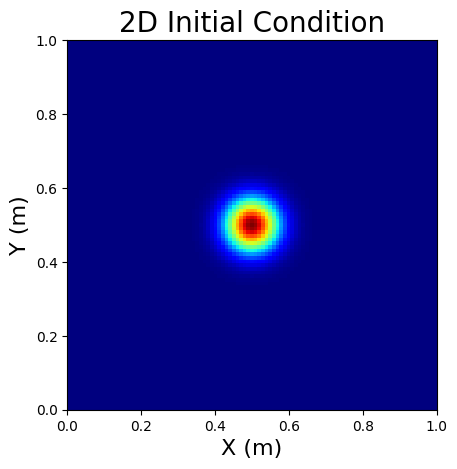

In [6]:
## . . Time axis parameters
nt,dt=121,0.01

## . . Space axis parameters
xmin,xmax,ymin,ymax=0,1,0,1
nx,ny=101,101
xx = np.linspace(xmin,xmax,nx)
yy = np.linspace(ymin,ymax,ny)
dx = xx[1]-xx[0]
dy = yy[1]-yy[0]

## . . Initial Condition
sigma=0.05
mx = (xmax-xmin)/2
my = (ymax-ymin)/2
U = np.zeros((nx,ny))

xxx, yyy = np.meshgrid(xx, yy, sparse=True)

U = np.exp(-(xxx-mx)**2/(2*sigma**2)-(yyy-my)**2/(2*(sigma**2)))

plt.figure()
plt.imshow(U,cmap='jet',extent=[xmin,xmax,ymin,ymax])
plt.xlabel('X (m)',fontsize=16);plt.ylabel('Y (m)',fontsize=16);
plt.title('2D Initial Condition',fontsize=20)
plt.show()

**Q3-1:** Write a function that inputs the following:

   * Solution at time step $t$
   * Discretization intervals: $dt$, $dx$ and $dy$.
   * Velocity components: $v_x$ and $v_y$
   * Boundary conditions

and then calculates the 2D advection equation solution update at time step $t+\Delta t$ that also enforces the boundary conditions.

In [7]:
## . . Your answer to Q3-1 goes here
def advecSol(U, dt, dx, dy, vx, vy, LB, RB, TB, BB):
    ny, nx = U.shape

    CCx= vx * dt/dx
    CCy= vy *dt/dy

    #coefficients
    bmx = CCx/2*(CCx+1)
    b0x= 1- CCx**2
    bpx= CCx / 2 * (CCx-1)
    bmy = CCy/2*(CCy+1)
    b0y= 1- CCy**2
    bpy= CCy / 2 * (CCy-1)

    #Calc Solution
    for j in range(1, ny-1):
        for i in range(1, nx-1):
            U[j, i] = (
                bmx * U[j, i-1] + b0x * U[j, i] + bpx * U[j, i+1] +
                bmy * U[j-1, i] + b0y * U[j, i] + bpy * U[j+1, i]
            )
    #apply boundary conditions
    U[:, 0]=LB
    U[:, -1]=RB
    U[0, :]=BB
    U[-1, :]=TB
    return U

**Q3-2:** Now write the code that time steps the 2D advection equation solution from the initial condition at time $t=0$ s a total of $nt=121$ steps at the given step of $dt=0.01$ s. You are required to advect the solution in a NW=$315^\circ$ direction. You may use combination of $v_x$ and $v_y$ that satisfy this direction; however, your solution should be stable.  Make a plot of the solution every 40 time steps.

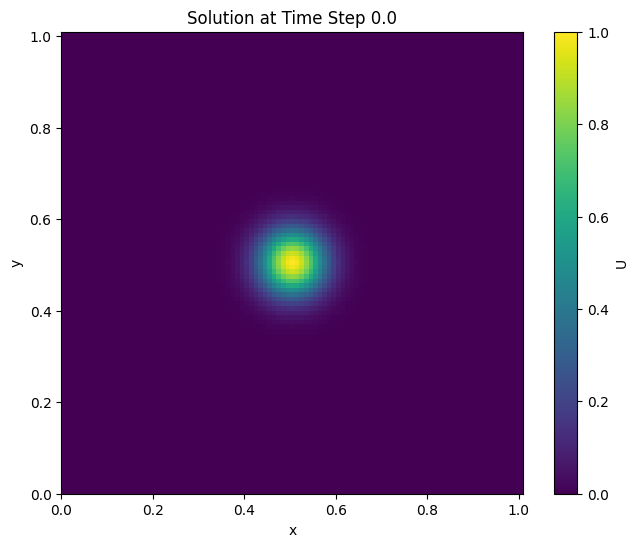

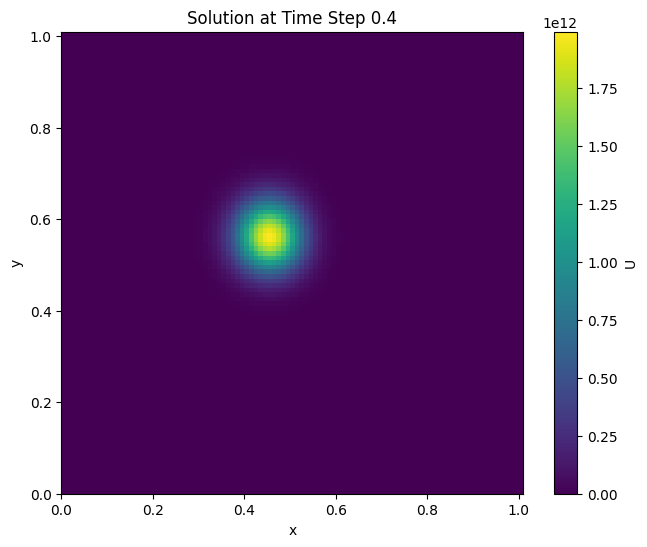

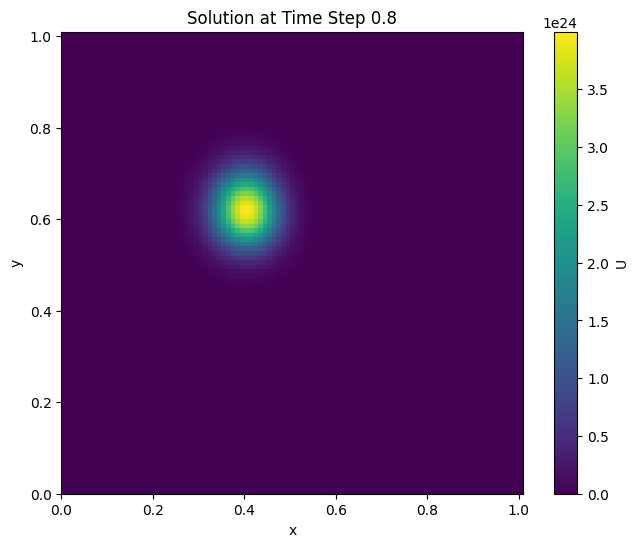

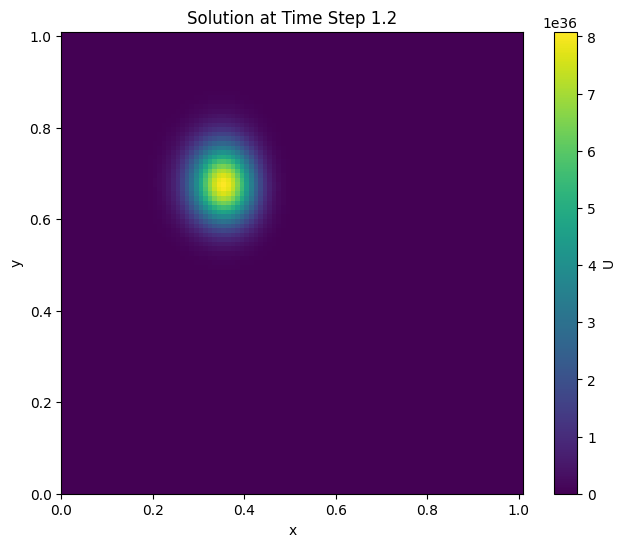

In [8]:
## . . Your answer to Q3-2 goes here
t=0
nt=121
dt=0.01
vx= -np.sqrt(2)/8
vy = np.sqrt(2)/8
U= np.exp(-(xxx-mx)**2/(2*sigma**2)-(yyy-my)**2/(2*(sigma**2)))
for step in range(121):
    if step%40 ==0:
        plt.figure(figsize=(8, 6))
        plt.title(f'Solution at Time Step {step * dt}')
        plt.imshow(U, origin='lower', extent=[0, nx*dx, 0, ny*dy], cmap='viridis')
        plt.colorbar(label='U')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    U= advecSol(U, dt, dx, dy, vx, vy, 0, 0, 0, 0)



**Q3-3:** What happens if you increase the time discretization interval to $dt=0.02$ s? Describe what you observe.

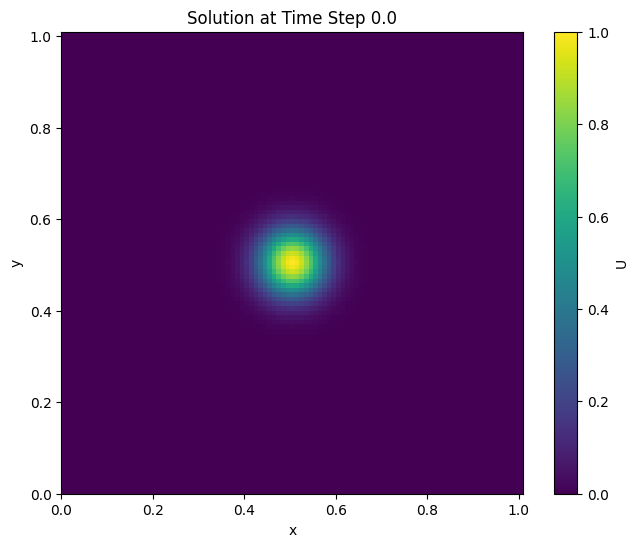

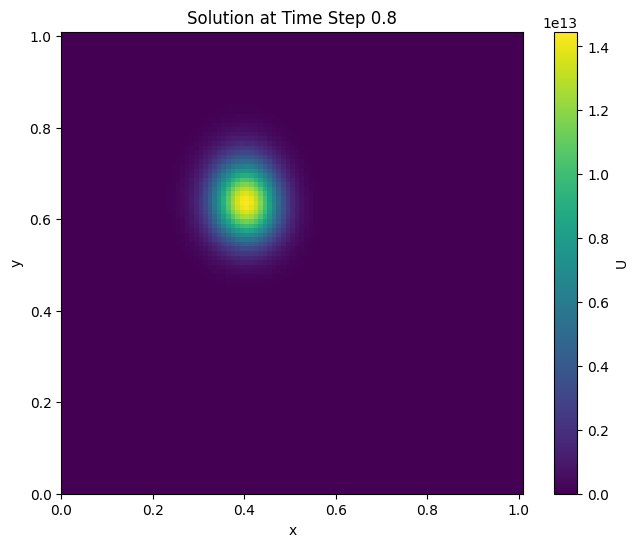

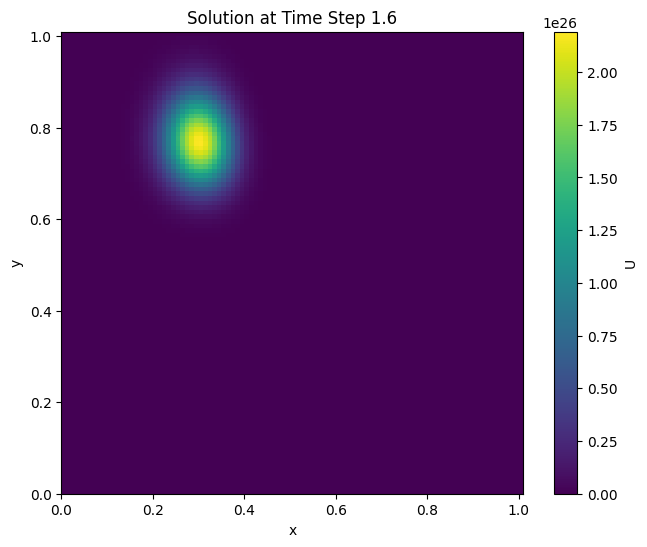

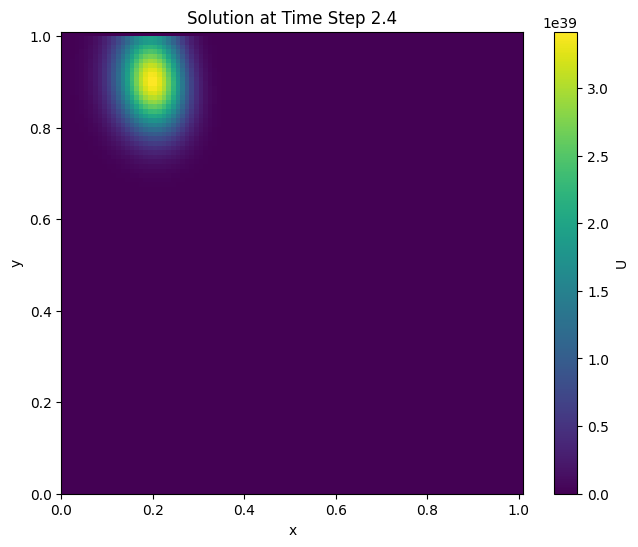

In [9]:
## . . Your answer to Q3-4 goes here
t=0
nt=121
dt=0.02
vx= -np.sqrt(2)/8
vy = np.sqrt(2)/8
U= np.exp(-(xxx-mx)**2/(2*sigma**2)-(yyy-my)**2/(2*(sigma**2)))
for step in range(121):
    if step%40 ==0:
        plt.figure(figsize=(8, 6))
        plt.title(f'Solution at Time Step {step * dt}')
        plt.imshow(U, origin='lower', extent=[0, nx*dx, 0, ny*dy], cmap='viridis')
        plt.colorbar(label='U')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    U= advecSol(U, dt, dx, dy, vx, vy, 0, 0, 0, 0)


## . . Your answer to Q3-4 goes here
After we increase the time discretization interval, our disturbance moves 'quicker' towards the upper-left corner of our image. Essentialy, the increase in time interval causes the disturbance to cover more ground in both the $x$ and $y$ direction over the $121$ steps. Also, it looks like the disturbance's area grows more with the increased time interval.

**Q3-4:** Let's now say that you had a spatially variable advection velocity field. How would you have to modify your code above to handle this scenario? (You don't have to actually do it for this question.)

## . . Your answer to Q3-4 goes here
To account for a spatially variable advection velocity field we would need to replace both of our constant $v_x$ and $v_y$ values with $2D$ arrays. Within these $2D$ arrays, the value $x_{i,j} \in V_x$ would represent the $x$-component (horizontal) of the velocity at point $i,j$ and $y_{i,j} \in V_y$ would represent the $y$-component (vertical) of the velocity at point $i,j$. Then within our advection solution function, instead of assigning our courant numbers before the nested for loops, we would do it during, which would allow our courant numbers to update based on the $x$ and $y$ location.    

# Part 4 - 2D Advection Equation in C (GPGN536 only)

Rewrite the python code in C. Use the python code to verify the C code result. Compare the computational time of your python code and C code.

You can use this [notebook](https://colab.research.google.com/drive/1b_mtAF4px-xpLM3j1gp7ktCmu2t6zH0w?usp=sharing) as template.

In [10]:
#Rewriting the python code here, that way I can run it without plotting the results
from time import time
t=0
nt=121
dt=0.01
vx= -np.sqrt(2)/8
vy = np.sqrt(2)/8
U= np.exp(-(xxx-mx)**2/(2*sigma**2)-(yyy-my)**2/(2*(sigma**2)))
tic=time()
for step in range(121):
    U= advecSol(U, dt, dx, dy, vx, vy, 0, 0, 0, 0)
toc = time()
print(f'Python realization: {toc-tic} s')


Python realization: 2.0227034091949463 s


In [11]:
## . . Your answer to Q4 goes here
%%writefile advection_c.c

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>

void advecSol(double **U, double dt, double dx, double dy, double vx, double vy,
              double LB, double RB, double TB, double BB, int nx, int ny) {
    // Calculate coefficients
    double CCx = vx * dt / dx;
    double CCy = vy * dt / dy;

    double bmx = CCx / 2 * (CCx + 1);
    double b0x = 1 - CCx * CCx;
    double bpx = CCx / 2 * (CCx - 1);
    double bmy = CCy / 2 * (CCy + 1);
    double b0y = 1 - CCy * CCy;
    double bpy = CCy / 2 * (CCy - 1);

    // Compute the solution
    for (int j = 1; j < ny - 1; ++j) {
        for (int i = 1; i < nx - 1; ++i) {
            U[j][i] = bmx * U[j][i - 1] + b0x * U[j][i] + bpx * U[j][i + 1] +
                      bmy * U[j - 1][i] + b0y * U[j][i] + bpy * U[j + 1][i];
        }
    }

    // Apply boundary conditions
    for (int j = 0; j < ny; ++j) {
        U[j][0] = LB;       // Left boundary
        U[j][nx - 1] = RB;  // Right boundary
    }
    for (int i = 0; i < nx; ++i) {
        U[0][i] = BB;      // Bottom boundary
        U[ny - 1][i] = TB; // Top boundary
    }
}

int main() {
    // Define constants
    int nx = 101, ny = 101;
    double xmin = 0.0, xmax = 1.0, ymin = 0.0, ymax = 1.0;
    double sigma = 0.05;
    double dx=(xmax - xmin) / (nx - 1);
    double dy= (ymax - ymin) / (ny - 1);
    double vx= -sqrt(2.0)/8.0;
    double vy = sqrt(2.0)/8.0;
    int nt=121;
    double dt = 0.02;
    // Calculate parameters
    double *xx = (double *)malloc(nx * sizeof(double));
    double *yy = (double *)malloc(ny * sizeof(double));
    double **U = (double **)malloc(ny * sizeof(double *));
    for (int i = 0; i < ny; ++i) {
        U[i] = (double *)malloc(nx * sizeof(double));
    }

    // Initialize x and y axes
    for (int i = 0; i < nx; ++i) {
        xx[i] = xmin + i * (xmax - xmin) / (nx - 1);
    }
    for (int j = 0; j < ny; ++j) {
        yy[j] = ymin + j * (ymax - ymin) / (ny - 1);
    }
    dx = xx[1] - xx[0];
    dy = yy[1] - yy[0];

    // Initial condition parameters
    double mx = (xmax - xmin) / 2;
    double my = (ymax - ymin) / 2;

    // Compute the 2D Gaussian function
    for (int j = 0; j < ny; ++j) {
        for (int i = 0; i < nx; ++i) {
            double x = xx[i];
            double y = yy[j];
            U[j][i] = exp(-pow(x - mx, 2) / (2 * pow(sigma, 2)) - pow(y - my, 2) / (2 * pow(sigma, 2)));
        }
    }

    // Time-stepping loop
    clock_t start_time=clock();

    for (int step = 0; step < nt; ++step) {
      // Update U
      advecSol(U, dt, dx, dy, vx, vy, 0, 0, 0, 0, nx, ny);

      // Save intermediate results for visualization
      //if (step % 40 == 0) {
        //char filename[50];
        //sprintf(filename, "solution_step_%03d.csv", step);
        //FILE *file = fopen(filename, "w");
        //if (file == NULL) {
          //perror("Unable to open file");
          //return 1;
          //}

        //fprintf(file, "X,Y,Value\n");
        //for (int j = 0; j < ny; ++j) {
          //for (int i = 0; i < nx; ++i) {
            //fprintf(file, "%lf,%lf,%lf\n", xx[i], yy[j], U[j][i]);
            //}
          //}

        //fclose(file);
        //printf("Data for time step %d written to %s\n", step, filename);
        //}
    }

 // Record the ending time
    clock_t end_time = clock();

    // Calculate the elapsed time in seconds
    double elapsed_time = (double)(end_time - start_time) / CLOCKS_PER_SEC;
    printf("C code execution time: %lf s\n", elapsed_time);

    // Free memory
    for (int i = 0; i < ny; ++i) {
        free(U[i]);
    }
    free(U);
    free(xx);
    free(yy);

    return 0;
}

Overwriting advection_c.c


In [12]:
%%shell
gcc -o advection_c advection_c.c -lm
./advection_c

C code execution time: 0.012244 s


The C implementation is much quicker than the Python implementation. While the python code consistently takes over $2$ seconds to run, the C code typically takes less than $0.1$ seconds.

In [13]:
# import numpy as np
# import matplotlib.pyplot as plt
# import glob

# # Load and plot each CSV file
# for filename in sorted(glob.glob("solution_step_*.csv")):
#     data = np.loadtxt(filename, delimiter=',', skiprows=1)
#     x = np.unique(data[:, 0])
#     y = np.unique(data[:, 1])
#     U = data[:, 2].reshape(len(y), len(x))

#     plt.figure(figsize=(8, 6))
#     plt.imshow(U, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis')
#     plt.colorbar(label='U')
#     plt.title(f'Solution from {filename}')
#     plt.xlabel('x')
#     plt.ylabel('y')
#     plt.show()

#NOTE: When I run this code with the function uncommented in the C version, the values are always slightly off by a scale of 2 but the behavior is exactly the same.